# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### 1.Loading the dataset and the initial explore

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [130]:
vehicle=pd.read_csv("C:\\Users\\粟登洋\\Desktop\\Dataset\\data\\vehicles.csv")

In [131]:
vehicle.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [132]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### 1.1 plot the price distribution

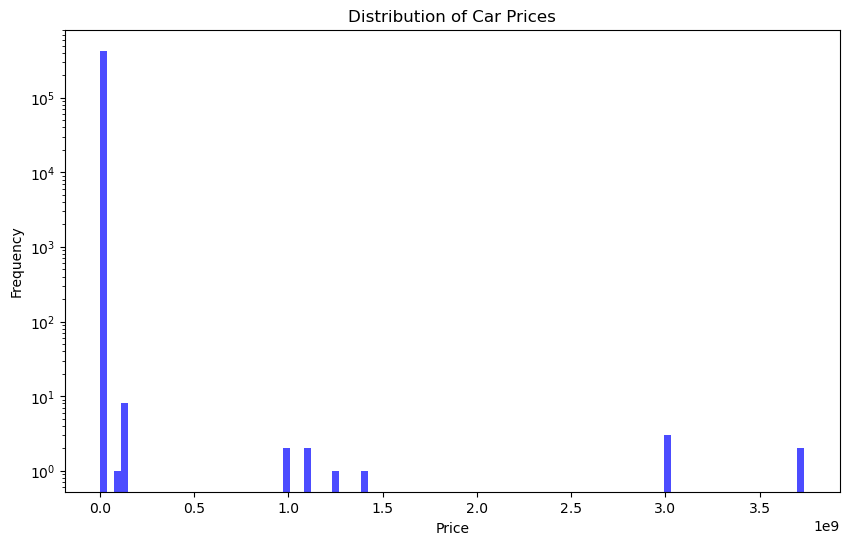

In [133]:
plt.figure(figsize=(10, 6))
plt.hist(vehicle['price'], bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yscale('log')  # 使用对数尺度展示长尾分布
plt.show()

### 1.2 Data celean

In [153]:
# 处理缺失值
vehicle_cleaned = vehicle.dropna(subset=['price', 'year']).copy()

vehicle_cleaned.loc[:, 'manufacturer'] = vehicle_cleaned['manufacturer'].fillna('Unknown')
vehicle_cleaned.loc[:, 'model'] = vehicle_cleaned['model'].fillna('Unknown')
vehicle_cleaned.loc[:, 'condition'] = vehicle_cleaned['condition'].fillna('Unknown')
vehicle_cleaned.loc[:, 'cylinders'] = vehicle_cleaned['cylinders'].fillna('Unknown')
vehicle_cleaned.loc[:, 'fuel'] = vehicle_cleaned['fuel'].fillna('Unknown')
vehicle_cleaned.loc[:, 'odometer'] = vehicle_cleaned['odometer'].fillna(vehicle_cleaned['odometer'].median())
vehicle_cleaned.loc[:, 'title_status'] = vehicle_cleaned['title_status'].fillna('Unknown')
vehicle_cleaned.loc[:, 'transmission'] = vehicle_cleaned['transmission'].fillna('Unknown')
vehicle_cleaned.loc[:, 'drive'] = vehicle_cleaned['drive'].fillna('Unknown')
vehicle_cleaned.loc[:, 'size'] = vehicle_cleaned['size'].fillna('Unknown')
vehicle_cleaned.loc[:, 'type'] = vehicle_cleaned['type'].fillna('Unknown')
vehicle_cleaned.loc[:, 'paint_color'] = vehicle_cleaned['paint_color'].fillna('Unknown')

# 删除价格为0的行
vehicle_cleaned = vehicle_cleaned[vehicle_cleaned['price'] > 0]

# 打印清洗后数据的基本信息
print(vehicle_cleaned.info())

# 检查清洗后的数据是否还存在异常价格或其他异常值
print(vehicle_cleaned['price'].describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392812 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            392812 non-null  int64  
 1   region        392812 non-null  object 
 2   price         392812 non-null  int64  
 3   year          392812 non-null  float64
 4   manufacturer  392812 non-null  object 
 5   model         392812 non-null  object 
 6   condition     392812 non-null  object 
 7   cylinders     392812 non-null  object 
 8   fuel          392812 non-null  object 
 9   odometer      392812 non-null  float64
 10  title_status  392812 non-null  object 
 11  transmission  392812 non-null  object 
 12  VIN           240716 non-null  object 
 13  drive         392812 non-null  object 
 14  size          392812 non-null  object 
 15  type          392812 non-null  object 
 16  paint_color   392812 non-null  object 
 17  state         392812 non-null  object 
dtypes: 

In [154]:
vehicle_cleaned.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,Unknown,Unknown,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,Unknown,Unknown,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,Unknown,Unknown,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,Unknown,Unknown,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### 特征工程


编码后的特征矩阵形状： (392812, 100)
      year  odometer  manufacturer_acura  manufacturer_alfa-romeo  \
27  2014.0   57923.0                   0                        0   
28  2010.0   71229.0                   0                        0   
29  2020.0   19160.0                   0                        0   
30  2017.0   41124.0                   0                        0   
31  2013.0  128000.0                   0                        0   

    manufacturer_aston-martin  manufacturer_audi  manufacturer_bmw  \
27                          0                  0                 0   
28                          0                  0                 0   
29                          0                  0                 0   
30                          0                  0                 0   
31                          0                  0                 0   

    manufacturer_buick  manufacturer_cadillac  manufacturer_chevrolet  ...  \
27                   0                      0               

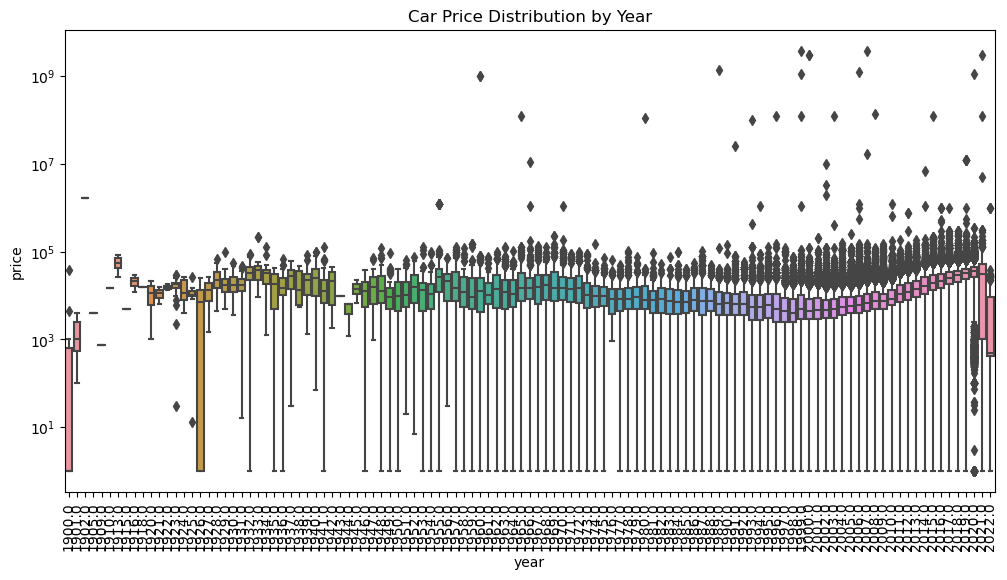

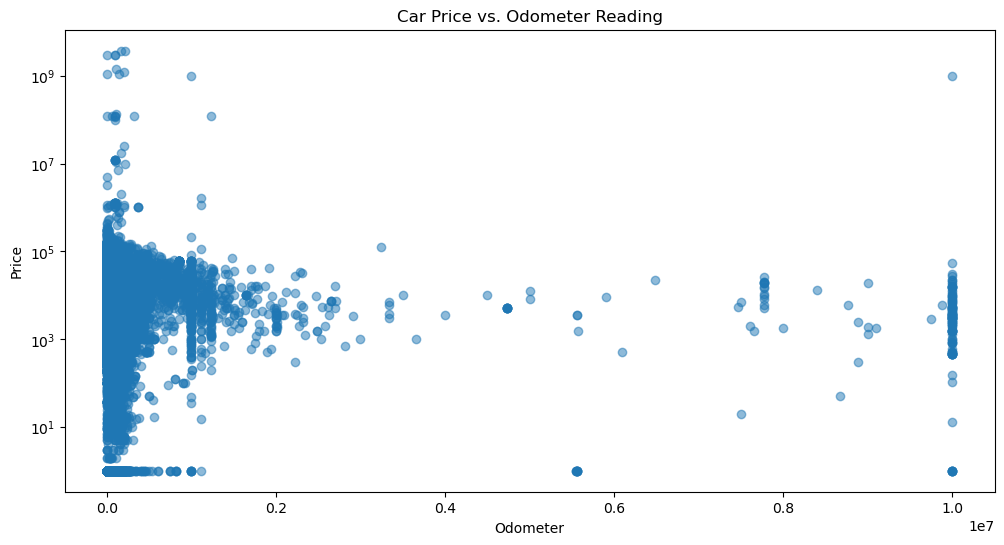

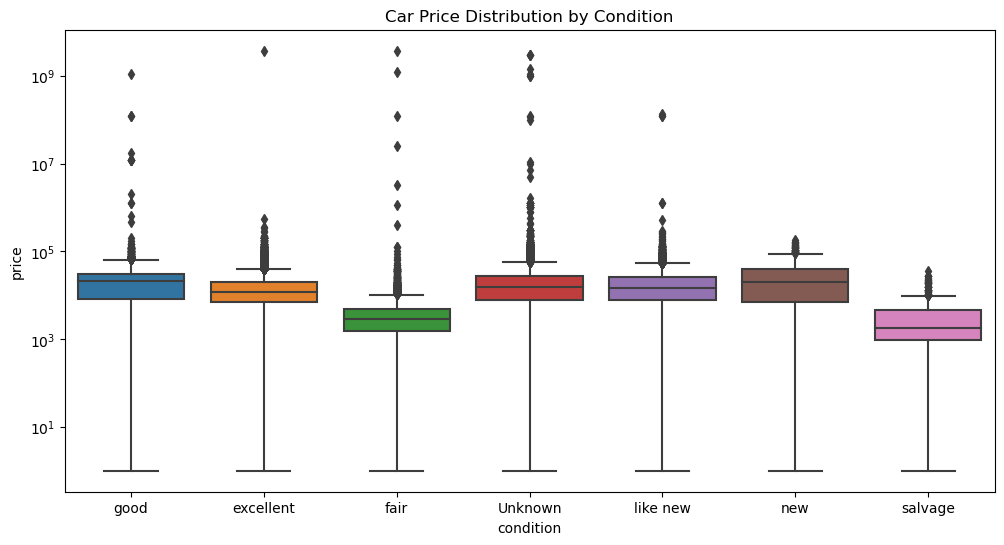

In [155]:

# 选择特征并对分类变量进行独热编码
features = ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
X = vehicle_cleaned[features]
y = vehicle_cleaned['price']

# 对分类特征进行独热编码
X_encoded = pd.get_dummies(X, drop_first=True)

# 显示编码后的数据
print("编码后的特征矩阵形状：", X_encoded.shape)
print(X_encoded.head())

# 绘制价格分布的箱线图，进一步观察
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='price', data=vehicle_cleaned)
plt.yscale('log')
plt.title('Car Price Distribution by Year')
plt.xticks(rotation=90)
plt.show()

# 进一步绘制其他特征与价格的关系图，比如里程数
plt.figure(figsize=(12, 6))
plt.scatter(X['odometer'], y, alpha=0.5)
plt.title('Car Price vs. Odometer Reading')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

# 也可以对'condition'特征绘制箱线图，观察不同条件下价格的变化
plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='price', data=vehicle_cleaned)
plt.yscale('log')
plt.title('Car Price Distribution by Condition')
plt.show()


In [137]:


# # 将目标变量 'price' 添加到特征矩阵中，以计算其相关系数
# X_encoded['price'] = y

# # 计算相关系数矩阵
# correlation_matrix = X_encoded.corr()

# # 提取与价格相关的相关系数，并按绝对值排序
# price_corr = correlation_matrix['price'].sort_values(ascending=False)

# # 打印价格相关系数
# print(price_corr)

# # 绘制相关系数的热力图
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
# plt.title('Correlation Matrix Heatmap')
# plt.show()

# # 绘制与价格相关的前10个最强特征
# plt.figure(figsize=(8, 6))
# price_corr[1:11].plot(kind='barh', color='blue')
# plt.title('Top 10 Features Correlated with Car Price')
# plt.xlabel('Correlation Coefficient')
# plt.ylabel('Features')
# plt.gca().invert_yaxis()  # 使得相关性高的特征在顶部
# plt.show()


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

MAE: 88311.40
RMSE: 14885074.33
R^2: -0.00


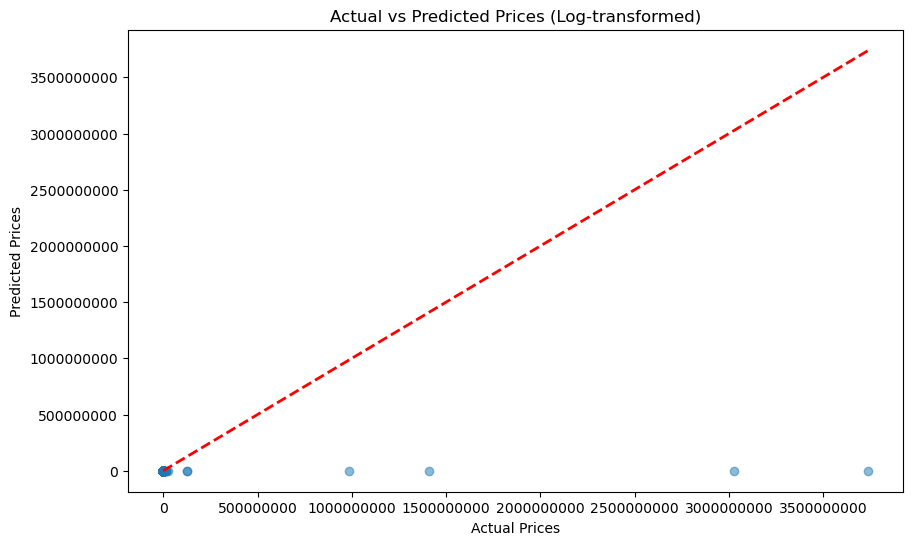

In [157]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import StandardScaler

# 对y进行对数转换
y_log = np.log1p(y)

# 确保对X_encoded特征进行标准化处理
#scaler = StandardScaler()
X_encoded_scaled = scaler.fit_transform(X_encoded)

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y_log, test_size=0.3, random_state=42)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 对测试集进行预测
y_pred_log = model.predict(X_test)

# 将预测值转换回原始尺度
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test)  # 反转对数变换后的真实值

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

# 绘制实际值与预测值的对比图，并确保不使用科学计数法
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices (Log-transformed)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# 禁用科学计数法并调整坐标轴的显示格式
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

# 进一步确保科学计数法禁用
plt.ticklabel_format(style='plain', axis='both')

plt.show()


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.